## Исследование сервиса по аренде самокатов GoFast

В нашем распоряжении данные сервиса по аренде самокатов GoFast. Данные состоят из 3 наборов данных. Данные о пользователях, их поездки и их подписки. Нужно проанализировать данные и проверьте некоторые гипотезы, которые могут помочь бизнесу вырасти.

Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:  
* *без подписки*  
   * абонентская плата отсутствует;  
   * стоимость одной минуты поездки — 8 рублей;  
   * стоимость старта (начала поездки) — 50 рублей;  
* *с подпиской Ultra*  
   * абонентская плата — 199 рублей в месяц;  
   * стоимость одной минуты поездки — 6 рублей;  
   * стоимость старта — бесплатно.  
**Цель исследования:**
1. Сравнение данных пользователей с подпиской и без неё;
2. Подсчёт выручки сервиса;
3. Проверка следующих гипотез:
   *  Тратят ли пользователи с подпиской больше времени на поездки?
   *  Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров?
   *  Будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки?
4. Решение по проверке гипотезы:
   * после обновления сервера, с которым взаимодействует сервис, станет ли меньше обращений в техническую поддержку?
**Ход исследования**  
Данные мы получим из трёх наборов данных:
* *'/datasets/users_go.csv'* - данные пользователей;
* *'/datasets/rides_go.csv'* - данные о поездках;
* *'/datasets/subscriptions_go.csv'* - данные о подписках.

Нет информации о качестве данных, потому нужно провести изучение данных до того, как приступать к ииследованию. После изучения данных сделаем предобработку данных, устраняя все возможные ошибки, пропуски и дубликаты данных, чтобы они не искажали результаты исследований.

Таким образом можно составить план исследования данных:
1. Загрузка и изучение данных;
2. Предобработка данных;
3. Анализ данных;
4. Объединение и группировка данных;
5. Подсчёт выручки сервиса;
6. Проверка гипотез;
7. Итоговые выводы по исследованиям.

### Загрузка данных

#### Импорт библиотек

In [ ]:
# Импортируем все нужны для работы библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from math import factorial
from scipy import stats as st

#### Загрузка данных

In [ ]:
 # Загружаем данные с возможностью загрузить их с сервера в случае недоступности локальных файлов
try:
    users = pd.read_csv('/datasets/users_go.csv')
    rides = pd.read_csv('/datasets/rides_go.csv')
    subscriptions = pd.read_csv('/datasets/subscriptions_go.csv')
except:
    users = pd.read_csv('https://***/datasets/users_go.csv')
    rides = pd.read_csv('https://***/datasets/rides_go.csv')
    subscriptions = pd.read_csv('https://***/datasets/subscriptions_go.csv')

#### Ознакомление с данными

##### Пользователи — *users_go.csv*(users)

In [ ]:
# Общая информация
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


In [ ]:
# Охарактеризовываем числовые данные
users.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,1565.0,762.633866,443.260155,1.0,378.0,762.0,1146.0,1534.0
age,1565.0,24.922045,4.553496,12.0,22.0,25.0,28.0,43.0


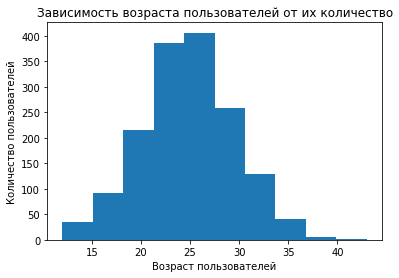

In [ ]:
# Построим гистограммы возраста пользователей
plt.hist(users['age'])
plt.title('Зависимость возраста пользователей от их количество')
plt.xlabel('Возраст пользователей')
plt.ylabel('Количество пользователей')
plt.show()

<div class="alert alert-info"> <b>Комментарии студента:</b> Понял, поправил. Позже все графики стал подписывать, но сам не понял, почему в начале проекта несколько графиков остались недоделанными. </div>

In [ ]:
# Выводим первые строки набора данных
users.head()

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


*Описание столбцов:*
* **user_id** - уникальный идентификатор пользователя;
* **name** - имя пользователя;
* **age** - возраст;
* **city** - город;
* **subscription_type** - тип подписки (free, ultra).

*В данном наборе данных имеется 5 столбцов. Всего 1565 строк. Пропусков данных нет. Тип данных столбца **subscription_type** можно изменить на "bool", заменив "ultra" на **True** и "free" на **False** для удобства исследования. Все столбцы приведены в "змеиный регистр", исправление не требуется. Согласно охарактеризации и гистограммам особых выбросов не обнаружено.*

##### Поездки — rides_go.csv(rides)

In [ ]:
# Общая информация
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


In [ ]:
# Охарактеризовываем числовые данные
rides.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,18068.0,842.869936,434.734317,1.000000,487.000000,889.000000,1213.250000,1534.000000
distance,18068.0,3070.659976,1116.831209,0.855683,2543.226360,3133.609994,3776.222735,7211.007745
duration,18068.0,17.805011,6.091051,0.500000,13.597563,17.678395,21.724800,40.823963


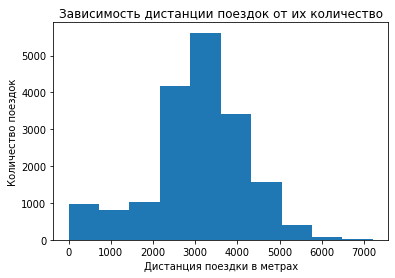

In [ ]:
# Построим гистограмму дистанции поездок
plt.hist(rides['distance'])
plt.title('Зависимость дистанции поездок от их количество')
plt.xlabel('Дистанция поездки в метрах')
plt.ylabel('Количество поездок')
plt.show()

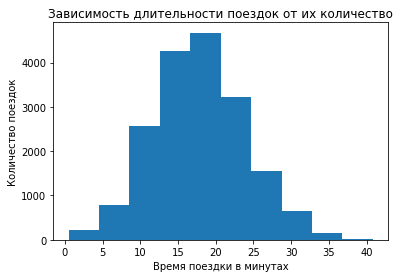

In [ ]:
# Построим гистограмму времени поездок
plt.hist(rides['duration'])
plt.title('Зависимость длительности поездок от их количество')
plt.xlabel('Время поездки в минутах')
plt.ylabel('Количество поездок')
plt.show()

In [ ]:
# Выводим первые строки набора данных
rides.head()

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


*Описание столбцов:*
* **user_id** - уникальный идентификатор пользователя;
* **distance** - расстояние, которое пользователь проехал в текущей сессии (в метрах);
* **duration** - продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»;
* **date** - дата совершения поездки.

*В данном наборе данных имеется 4 столбца. Всего 18068 строк. Пропусков данных нет.Тип данных столбца **date** можно изменить на "datetime" для удобства исследования. Все столбцы приведены в "змеиный регистр", исправление не требуется. Согласно  охарактеризации и гистограммам возможны выбросы в столбцах **distance** и **duration**.*

##### Подписки — subscriptions_go.csv(subscriptions)

In [ ]:
# Общая информация
subscriptions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


In [ ]:
# Выводим строки набора данных
subscriptions

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


*Описание столбцов:*
* **subscription_type** - тип подписки;
* **minute_price** - стоимость одной минуты поездки по данной подписке;
* **start_ride_price** - стоимость начала поездки;
* **subscription_fee** - стоимость ежемесячного платежа.

*В данном наборе данных имеется 4 столбца. Всего 2 строки. Пропусков данных нет.Тип данных столбца **subscription_type** можно изменить на "bool", заменив "ultra" на **True** и "free" на **False** для удобства исследования. Все столбцы приведены в "змеиный регистр", исправление не требуется. Охарактеризация данных и гистограммы не нужны в виду малого количества данных.*

#### Вывод по загрузке данных

Все данные загружены и изучены:
* Пропусков нет;
* Тип данных нужно изменить в следующих наборах данных:
    * **users** - столбец **subscription_type**(*object - bool*);
    * **rides** - столбец **date**(*object - datetime*);
    * **subscriptions** - столбец **subscriptions_type**(*object - bool*).
* Исправления в названиях столбцов не требуются;
* Возможны выбросы в наборе данных **rides** в столбцах **distance** и **duration**.

### Предобработка данных

#### План предобработки данных

На основе изученных данных составим план предобработки данных:
* [x] Изменить тип данных:
    * **users** - столбец **subscription_type**(*object - bool*);
    * **rides** - столбец **date**(*object - datetime*);
    * **subscriptions** - столбец **subscriptions_type**(*object - bool*).
* [x] Создать новый столбец на основе столбца **date**;
* [x] Проверить данных на наличие явных и неявных дубликатов;
* [x] Обработать дубликаты.

#### Изменение типа данных

##### Тип подписки

In [ ]:
# обработываем набор данных users
users.loc[users['subscription_type'] == 'ultra', 'subscription_type'] = True
users.loc[users['subscription_type'] == 'free', 'subscription_type'] = False
users['subscription_type'] = users['subscription_type'].astype('bool')

In [ ]:
# Точно так же обработываем набор данных subscriptions
subscriptions.loc[subscriptions['subscription_type'] == 'ultra', 'subscription_type'] = True
subscriptions.loc[subscriptions['subscription_type'] == 'free', 'subscription_type'] = False
subscriptions['subscription_type'] = subscriptions['subscription_type'].astype('bool')

##### Дата совершения поездки

In [ ]:
# обрабатываем набор данных rides
rides['date'] = pd.to_datetime(rides['date'], format='%Y-%m-%d')

#### Добавление столбца

In [ ]:
# Выведем на экран весь период,отобранный полученным от сервиса набором данных
print('Полученный набор даных захватывает период времени от', rides['date'].min(),'до', rides['date'].max())

Полученный набор даных захватывает период времени от 2021-01-01 00:00:00 до 2021-12-30 00:00:00


In [ ]:
# Добавляем новый столбец month с месяцем совершения поездки из столбца date
rides['month'] = pd.DatetimeIndex(rides['date']).month

####  Проверка дубликатов

##### Дубликаты уникальных пользователей

In [ ]:
# Проверяем дубликаты в столбе user_id
users.sort_values(by='user_id').loc[users['user_id'].duplicated() == True].count()

user_id              31
name                 31
age                  31
city                 31
subscription_type    31
dtype: int64

##### Дубликаты городов

In [ ]:
# Проверяем дубликаты в столбце city
users['city'].unique()

array(['Тюмень', 'Омск', 'Москва', 'Ростов-на-Дону', 'Краснодар',
       'Пятигорск', 'Екатеринбург', 'Сочи'], dtype=object)

##### Вывод по дубликатам

*Обнаружены 31 дубликат в столбце user_id набора данных **users**, их можно удалить. Дубликатов в столбце **city** не обнаружено.*

#### Обработка дубликатов

In [ ]:
# Удаляем дубликаты уникальных пользователей в столбце user_id набора данных users
users = users.sort_values(by='user_id').loc[users['user_id'].duplicated() == False]

In [ ]:
# Ещё раз проверяем дубликаты уникальных пользователей
users.sort_values(by='user_id').loc[users['user_id'].duplicated() == True].count()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

####  Вывод по предобработке данных

* Типы данных успешно изменены:
    * **users** - столбец **subscription_type**(*object - bool*);
    * **rides** - столбец **date**(*object - datetime*);
    * **subscriptions** - столбец **subscriptions_type**(*object - bool*).
* На основе столбца **date** в наборе данных **rides** создан **month** с месяцем поездки;
* В наборе данных **users** столбце **user_id** обнаружены и удалены 31 дубликат.

### Исследовательский анализ данных

#### План исследований данных

Исследуем следующие данные:
* [x] Частота встречаемости городов;
* [x] Соотношение пользователей с подпиской и без подписки;
* [x] Возраст пользователей;
* [x] Расстояние, которое пользователь преодолел за одну поездку;
* [x] Продолжительность поездок.

#### Частота встречаемости городов

In [ ]:
# Составляем сводную таблицу количество пользователей в каждом городе
users.pivot_table(index='city', values='user_id', aggfunc='count').sort_values(by='user_id', ascending=False)

,user_id
city,
Пятигорск,219
Екатеринбург,204
Ростов-на-Дону,198
Краснодар,193
Сочи,189
Омск,183
Тюмень,180
Москва,168


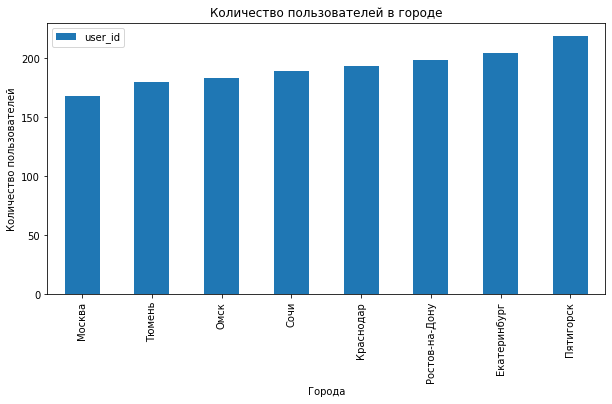

In [ ]:
# На основе полученой таблицы строим график для наглядности
(
    users.pivot_table(index='city', values='user_id', aggfunc='count').sort_values(by='user_id', ascending=True)
    .plot(kind='bar', figsize=(10, 5))
)
plt.title('Количество пользователей в городе')
plt.ylabel('Количество пользователей')
plt.xlabel('Города')
plt.show()

*Больше всего пользователей сервиса находятся в **Пятигорске**(219 человек), меньше всего в **Москве**(168 человек).*

#### Соотношение пользователей с подпиской и без подписки

In [ ]:
# Составляем сводную таблицу количество пользователей с подпиской и без
users.pivot_table(index='subscription_type', values='user_id', aggfunc='count').sort_values(by='user_id', ascending=False)

,user_id
subscription_type,
False,835
True,699


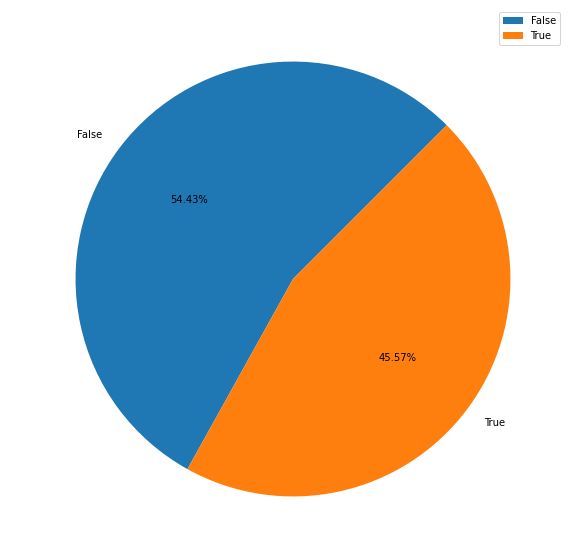

In [ ]:
# На основе полученой таблицы строим круговую диаграмму для наглядности
(
    users.pivot_table(index='subscription_type', values='user_id', aggfunc='count')
    .plot(kind='pie',y='user_id', figsize=(10, 10), autopct='%1.2f%%', startangle=45)
)
plt.ylabel(' ')
plt.show()

*Пользователей без подписки(835 человек) пользуются сервисом больше, чем с подпиской(699 человек), но доли обеих категорий пользователей не сильно разнятся(54.42% и 45.57% соответственно).*

#### Возраст пользователей

In [ ]:
# Составляем сводную таблицу возраста пользователей
users.pivot_table(index='age', values='user_id', aggfunc='count').sort_values(by='user_id', ascending=False)

,user_id
age,
25,145
24,132
26,131
23,129
27,119
22,119
28,112
21,93
20,71


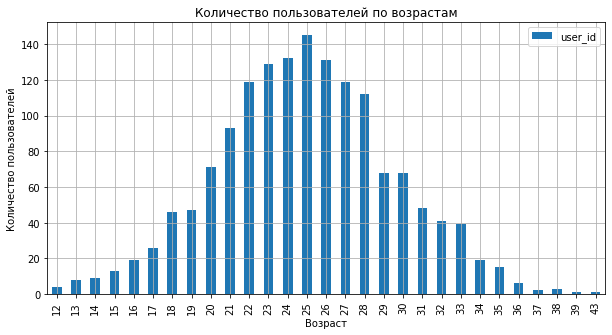

In [ ]:
# На основе полученой таблицы строим график для наглядности
(
    users.pivot_table(index='age', values='user_id', aggfunc='count')
    .plot(kind='bar', grid=True, figsize=(10, 5))
)
plt.title('Количество пользователей по возрастам')
plt.ylabel('Количество пользователей')
plt.xlabel('Возраст')
plt.show()

In [ ]:
# И охарактеризовываем данные
users['age'].describe()

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

*Сервисом пользуются пользователи в возрасте от 12 до 43 лет. Больше всего пользователей имеют возраст от 22 до 28 лет. Средний возраст пользователя сервисом составляет 25 лет.*

#### Расстояние, которое пользователь преодолел за одну поездку

In [ ]:
# Охарактеризуем расстояния поездок
rides['distance'].describe()

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

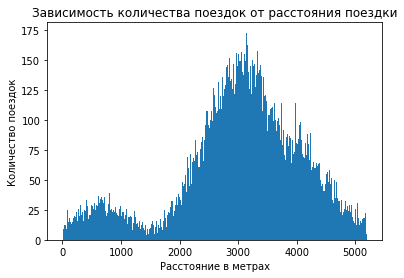

In [ ]:
# И построим гистограмму отбросив выбросы в виде редких очень длинных поездок
plt.hist(rides['distance'], bins=300, range=(1,5200))
plt.title('Зависимость количества поездок от расстояния поездки')
plt.xlabel('Расстояние в метрах')
plt.ylabel('Количество поездок')
plt.show()

*Большинство поездок проходит от 2500 до 3800 метров. Средняя поездка составляет 3100 метров. Самая длинная поездка зафиксированна на 7200 метров.*

#### Продолжительность поездок

In [ ]:
# Охарактеризуем продолжительность поездок
rides['duration'].describe()

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

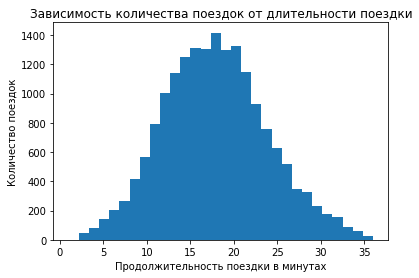

In [ ]:
# И построим гистограмму отбросив выбросы в виде редких очень долгих поездок
plt.hist(rides['duration'], bins=30, range=(1,36))
plt.title('Зависимость количества поездок от длительности поездки')
plt.xlabel('Продолжительность поездки в минутах')
plt.ylabel('Количество поездок')
plt.show()

*Большинство поездок занимает 13 до 23 минут. Средняя продолжительность поездки стоставляет 17 минут. Самая долгая поездка зафиксирована в 40 минут.*

#### Выводы по анализу данных

* Больше всего сервис популярен в городе **Пятигорск**, меньше всего популярен сервис в городе **Москва**;
* Разница между пользователями с подпиской и без неё не велика, но всё же **большинство** пользователей сервиса не пользуются подпиской;
* Сервисом пользуются пользователи в возрасте **от 12 до 43 лет**, но наиболее популярен сервис среди пользователей возрастом **около 25 лет**;
* Большинство поездок происходит на расстояние **около 3км**, но зафиксированы случаи поездки на расстояние **до 7 км**;
* Большинство поездок продолжаются **около 15 минут**, но зафиксированы случаи поездок **до 40 минут**.

### Объединение данных

#### План объединения данных

В ходе объединения данных выполним следующий действия:
* [x] Объединить все наборы данных в один общий;
* [x] Оценить удачность объединения наборов данных;
* [x] Разделить общий набор данных на две категории пользователей(с подпиской и без неё);
* [x] Сравнить две категории пользователей по дистанции поездок;
* [x] Сравнить две категории пользователей по времени поездок;
* [x] Сравнить две категории пользователей по количеству записей.

#### Общий набор данных

In [ ]:
print('Количество строк в исходных наборах данных составляет:')
print('users:', users['user_id'].count(), 'строк;')
print('rides:', rides['user_id'].count(), 'строк.')

Количество строк в исходных наборах данных составляет:
users: 1534 строк;
rides: 18068 строк.


In [ ]:
# Объединяем набор данных users с rides через столбец user_id в новый набор данных
df = users.merge(rides, on='user_id')

In [ ]:
# Проверяем получившийся набор данных
df.head(10)

,user_id,name,age,city,subscription_type,distance,duration,date,month
0,1,Кира,22,Тюмень,True,4409.919140,25.599769,2021-01-01,1
1,1,Кира,22,Тюмень,True,2617.592153,15.816871,2021-01-18,1
2,1,Кира,22,Тюмень,True,754.159807,6.232113,2021-04-20,4
3,1,Кира,22,Тюмень,True,2694.783254,18.511000,2021-08-11,8
4,1,Кира,22,Тюмень,True,4028.687306,26.265803,2021-08-28,8
5,1,Кира,22,Тюмень,True,2770.890808,16.650138,2021-10-09,10
6,1,Кира,22,Тюмень,True,3039.020292,14.927879,2021-10-19,10
7,1,Кира,22,Тюмень,True,2842.118050,23.117468,2021-11-06,11
8,1,Кира,22,Тюмень,True,3412.690668,15.238072,2021-11-14,11
9,1,Кира,22,Тюмень,True,748.690645,15.041884,2021-11-22,11


In [ ]:
# Объединяем набор данных df с subscriptions через столбец subscription_type
df = df.merge(subscriptions, on='subscription_type')

In [ ]:
# Проверяем получившийся набор данных
df

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,True,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,True,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,True,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,True,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,True,4028.687306,26.265803,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,False,3781.098080,19.822962,2021-11-04,11,8,50,0
18064,1534,Альберт,25,Краснодар,False,2840.423057,21.409799,2021-11-16,11,8,50,0
18065,1534,Альберт,25,Краснодар,False,3826.185507,18.435051,2021-11-18,11,8,50,0
18066,1534,Альберт,25,Краснодар,False,2902.308661,16.674362,2021-11-27,11,8,50,0


In [ ]:
# Проверяем количество строк в получившемся наборе данных
print('Количество строк в получившемся наборах данных составляет:', df['user_id'].count(), 'строк.')

Количество строк в получившемся наборах данных составляет: 18068 строк.


*В имеющихся наборах данных небыло пропусков, потому набор данных получился полноценным, без потери данных.*

#### Новые наборы данных

In [ ]:
# Создадаём отдельный набор данных с пользователями с подпиской
ultra = df.loc[df['subscription_type'] == True]

In [ ]:
# Проверяем получившийся набор данных
ultra

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,True,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,True,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,True,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,True,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,True,4028.687306,26.265803,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
6495,699,Оксана,22,Москва,True,3973.046497,24.671163,2021-08-29,8,6,0,199
6496,699,Оксана,22,Москва,True,3288.702563,15.892886,2021-09-12,9,6,0,199
6497,699,Оксана,22,Москва,True,3076.159348,14.389525,2021-09-26,9,6,0,199
6498,699,Оксана,22,Москва,True,4707.845501,15.839579,2021-10-17,10,6,0,199


In [ ]:
# Проверяем количество строк в получившемся наборе данных
print('Количество строк в получившемся наборах данных составляет:', ultra['user_id'].count(), 'строк.')

Количество строк в получившемся наборах данных составляет: 6500 строк.


In [ ]:
# Создадаём отдельный набор данных с пользователями без подписки
free = df.loc[df['subscription_type'] == False]

In [ ]:
# Проверяем получившийся набор данных
free

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,False,2515.690719,14.944286,2021-01-02,1,8,50,0
6501,700,Айдар,22,Омск,False,846.932642,16.234663,2021-02-01,2,8,50,0
6502,700,Айдар,22,Омск,False,4004.434142,20.016628,2021-02-04,2,8,50,0
6503,700,Айдар,22,Омск,False,1205.911290,9.782872,2021-02-10,2,8,50,0
6504,700,Айдар,22,Омск,False,3047.379435,17.427673,2021-02-14,2,8,50,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,False,3781.098080,19.822962,2021-11-04,11,8,50,0
18064,1534,Альберт,25,Краснодар,False,2840.423057,21.409799,2021-11-16,11,8,50,0
18065,1534,Альберт,25,Краснодар,False,3826.185507,18.435051,2021-11-18,11,8,50,0
18066,1534,Альберт,25,Краснодар,False,2902.308661,16.674362,2021-11-27,11,8,50,0


In [ ]:
# Проверяем количество строк в получившемся наборе данных
print('Количество строк в получившемся наборах данных составляет:', free['user_id'].count(), 'строк.')

Количество строк в получившемся наборах данных составляет: 11568 строк.


In [ ]:
# Проверим разделённые наборы данных на потерю данных
if ultra['user_id'].count() + free['user_id'].count() == df['user_id'].count():
    print('Набор данных разделён без потери данных')
else:
    print('Набор данных разделён не коректно')

Набор данных разделён без потери данных


#### Сравнение данных

##### Сравнение дистанции поездок

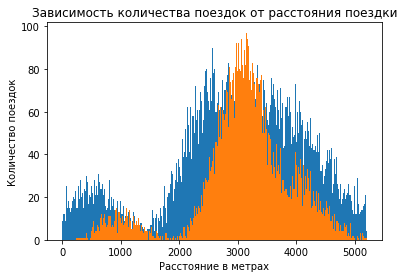

In [ ]:
# Строим двойную гистограмму зависимости количества поездок от расстрояния поездок
plt.hist(free['distance'], bins=300, range=(1,5200))
plt.hist(ultra['distance'], bins=300, range=(1,5200))
plt.title('Зависимость количества поездок от расстояния поездки')
plt.xlabel('Расстояние в метрах')
plt.ylabel('Количество поездок')
plt.show()

In [ ]:
# Охарактеризовываем данные пользователей без подписки
free['distance'].describe()

count    11568.000000
mean      3045.495282
std       1246.173806
min          0.855683
25%       2366.562689
50%       3114.648465
75%       3905.697894
max       7211.007745
Name: distance, dtype: float64

In [ ]:
# Охарактеризовываем данные пользователей с подпиской
ultra['distance'].describe()

count    6500.000000
mean     3115.445388
std       836.895330
min       244.210438
25%      2785.444017
50%      3148.637229
75%      3560.574425
max      5699.769662
Name: distance, dtype: float64

*Особой разницы в дистанциях поездок с подпиской и без неё нет. Средняя дистанция поездки в обеих категориях пользователей равна примерно 3100 метров.*

##### Сравнение времени поездок

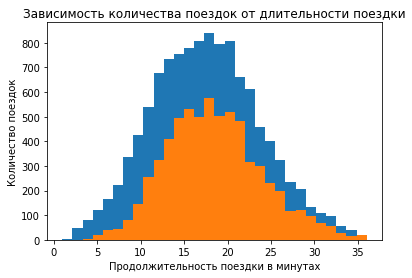

In [ ]:
# Строим двойную гистограмму зависимости количества поездок от времени поездок
plt.hist(free['duration'], bins=30, range=(1,36))
plt.hist(ultra['duration'], bins=30, range=(1,36))
plt.title('Зависимость количества поездок от длительности поездки')
plt.xlabel('Продолжительность поездки в минутах')
plt.ylabel('Количество поездок')
plt.show()

In [ ]:
# Охарактеризовываем данные пользователей без подписки
free['duration'].describe()

count    11568.000000
mean        17.390909
std          6.326803
min          0.500000
25%         12.958437
50%         17.326890
75%         21.594071
max         34.948498
Name: duration, dtype: float64

In [ ]:
# Охарактеризовываем данные пользователей с подпиской
ultra['duration'].describe()

count    6500.000000
mean       18.541985
std         5.572048
min         3.760353
25%        14.524654
50%        18.178153
75%        21.884129
max        40.823963
Name: duration, dtype: float64

*Особой разницы во времени поездок с подпиской и без неё нет. **Проверим эту гипотезу позже.** Среднее время поездки в обеих категориях пользователей равно примерно 18 минутам.*

##### Сравнение количества поездок

In [ ]:
# Посчитаем, на сколько поездок без подписки больше, чем с подпиской
free['duration'].count() / ultra['duration'].count()

1.7796923076923077

#### Выводы по объединению данных

* Все наборы данных удачно объеденены в один общий набор данных **df** без потери данных;
* Общий набор данных разделён на два новых набора данных с пользователям с подпиской(**ultra**) и без подписки(**free**);
* Между новыми категориями данных нет особой разницы в дистанции и времени поездок;
* Поездок пользователей без подписки в 1.8 раза больше, чем у пользователей с подпиской.

### Подсчёт выручки

####  План подсчёта выручки

В ходе подсчёта выручки выполним следующий действия:
* [x] Создать набор данных с агрегированными данными о поездках для каждого пользователя:
    * [x] Найти сумарное расстояние поездок;
    * [x] Найти общее количество поездок;
    * [x] Найти сумарное время поездок.
* [x] Создать столбец с помесячной выручкой каждого пользователя;
* [x] Посчитать общую выручку за весь период, отобранный полученным набором данных.

#### Набор данных с агрегированными данными

In [ ]:
# Округляем каждое значение из столбца duration с помощью «потолка»:
df['duration'] = np.ceil(df['duration'])

In [ ]:
# Создадим сводную таблицу с агрегированными данными
aggregation = df.pivot_table(
    index=('user_id', 'month'),
    values=(
        'distance',
        'duration',
        'minute_price',
        'start_ride_price',
        'subscription_fee'
    ),
    aggfunc=({'distance':{'count', 'sum'},
             'duration':'sum',
             'minute_price': 'mean',
             'start_ride_price':'mean',
             'subscription_fee':'mean',})
)

In [ ]:
# Проверяем получившуюся сводную таблицу
aggregation

distance               duration minute_price start_ride_price  \
                 count           sum      sum         mean             mean   
user_id month                                                                 
1       1            2   7027.511294     42.0            6                0   
        4            1    754.159807      7.0            6                0   
        8            2   6723.470560     46.0            6                0   
        10           2   5809.911100     32.0            6                0   
        11           3   7003.499363     56.0            6                0   
...                ...           ...      ...          ...              ...   
1534    6            2   3409.468534     26.0            8               50   
        8            2   7622.453034     48.0            8               50   
        9            1   4928.173852     23.0            8               50   
        11           4  13350.015305     78.0            8               50   
        12           1   2371.711192     16.0            8               50   

              subscription_fee  
                          mean  
user_id month                   
1       1                  199  
        4                  199  
        8                  199  
        10                 199  
        11                 199  
...                        ...  
1534    6                    0  
        8                    0  
        9                    0  
        11                   0  
        12                   0  

[11331 rows x 6 columns]

In [ ]:
# Переименовываем столбцы сводной таблицы
aggregation.columns = [
    'count',
    'distance',
    'duration',
    'minute_price',
    'start_ride_price',
    'subscription_fee'
]

In [ ]:
# Ещё раз проверяем получившуюся сводную таблицу
aggregation

count      distance  duration  minute_price  start_ride_price  \
user_id month                                                                  
1       1          2   7027.511294      42.0             6                 0   
        4          1    754.159807       7.0             6                 0   
        8          2   6723.470560      46.0             6                 0   
        10         2   5809.911100      32.0             6                 0   
        11         3   7003.499363      56.0             6                 0   
...              ...           ...       ...           ...               ...   
1534    6          2   3409.468534      26.0             8                50   
        8          2   7622.453034      48.0             8                50   
        9          1   4928.173852      23.0             8                50   
        11         4  13350.015305      78.0             8                50   
        12         1   2371.711192      16.0             8                50   

               subscription_fee  
user_id month                    
1       1                   199  
        4                   199  
        8                   199  
        10                  199  
        11                  199  
...                         ...  
1534    6                     0  
        8                     0  
        9                     0  
        11                    0  
        12                    0  

[11331 rows x 6 columns]

In [ ]:
# Проверим получившуюся сводную таблицу на наличие пропусков перед подсчётом выручки
aggregation.isna().sum()

count               0
distance            0
duration            0
minute_price        0
start_ride_price    0
subscription_fee    0
dtype: int64

#### Столбец с помесячной выручкой

In [ ]:
# Создаём новый столбец revenue с подсчитанной выручкой
# от каждого пользователя помесячно
aggregation['revenue'] = (
aggregation['start_ride_price']*aggregation['count']+
aggregation['minute_price']*aggregation['duration']+
aggregation['subscription_fee'])

In [ ]:
# Проверяем получившуюся сводную таблицу
aggregation

count      distance  duration  minute_price  start_ride_price  \
user_id month                                                                  
1       1          2   7027.511294      42.0             6                 0   
        4          1    754.159807       7.0             6                 0   
        8          2   6723.470560      46.0             6                 0   
        10         2   5809.911100      32.0             6                 0   
        11         3   7003.499363      56.0             6                 0   
...              ...           ...       ...           ...               ...   
1534    6          2   3409.468534      26.0             8                50   
        8          2   7622.453034      48.0             8                50   
        9          1   4928.173852      23.0             8                50   
        11         4  13350.015305      78.0             8                50   
        12         1   2371.711192      16.0             8                50   

               subscription_fee  revenue  
user_id month                             
1       1                   199    451.0  
        4                   199    241.0  
        8                   199    475.0  
        10                  199    391.0  
        11                  199    535.0  
...                         ...      ...  
1534    6                     0    308.0  
        8                     0    484.0  
        9                     0    234.0  
        11                    0    824.0  
        12                    0    178.0  

[11331 rows x 7 columns]

In [ ]:
# Удалим лишние столбцы
aggregation = aggregation.drop(['start_ride_price', 'minute_price'], axis=1)

In [ ]:
# Проверяем итоговую сводную таблицу
aggregation

count      distance  duration  subscription_fee  revenue
user_id month                                                          
1       1          2   7027.511294      42.0               199    451.0
        4          1    754.159807       7.0               199    241.0
        8          2   6723.470560      46.0               199    475.0
        10         2   5809.911100      32.0               199    391.0
        11         3   7003.499363      56.0               199    535.0
...              ...           ...       ...               ...      ...
1534    6          2   3409.468534      26.0                 0    308.0
        8          2   7622.453034      48.0                 0    484.0
        9          1   4928.173852      23.0                 0    234.0
        11         4  13350.015305      78.0                 0    824.0
        12         1   2371.711192      16.0                 0    178.0

[11331 rows x 5 columns]

#### Общая выручка сервиса

In [ ]:
# Считаем общую выручку за весь период, отобранный полученным от сервиса набором данных
aggregation['revenue'].sum()

3878641.0

#### Выводы по подсчёту выручки

В ходе подсчёта выручки:
* Создан новый набор данных(**aggregation**) с агрегированными данными по каждому пользователю;
* В новом наборе данных создан новый столбец(**revenue**), содержащий выручку от каждого пользователя по месяцам;
* Посчитана общая выручка сервиса(**3878641руб.**) за весь период, отобранный полученным от сервиса набором данных.

### Проверка гипотез

#### План проверки гипотез

В ходе проверки гипотез необходимо проверить следующие гипотезы:
* [x] Тратят ли пользователи с подпиской больше времени на поездки?
* [x] Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров?
* [x] Будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки?

Так же нужно решить, каким тестом можно проверить гипотезу о том, что *после обновления сервера, с которым взаимодействует сервис, обращений в техническую поддержку станет меньше.*

#### Первая гипотеза

Определяем нулевую(H0) и альтернативную(H1) гипотезы:
* **H0:** Средняя продолжительность времени поезки пользователей с подпиской и без неё равна;
* **H1:** Средняя продолжительность времени поезки пользователей с подпиской меньше, без неё.

In [ ]:
# Примем уровень статистической значимости равно .05
alpha = .05

# Посчитаем p-значение
results = st.ttest_ind(ultra['duration'], free['duration'], alternative='greater')
print('p-значение:', results.pvalue)


# И проверяем гипотезу
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 1.2804098316645618e-34
Отвергаем нулевую гипотезу


**Вывод:** *Отвергаем нулевую гипотезу, среднее время продолжительности поездок пользователей **с подпиской меньше**, чем **без подписки**, не смотря на то, что на гистограмме этого небыло видно.*

####  Вторая гипотеза

Оптимальное расстояние одной поездки на самокате с точки зрения его износа равно **3130 метров**.

Определяем нулевую(H0) и альтернативную(H1) гипотезы:
* **H0:** Среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, равно 3130 метров;
* **H1:** Среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, больше 3130 метров.

In [ ]:
# Примем уровень статистической значимости равно .05
alpha = .05

# Укажем оптимальное расстояние одной поездки
distance = 3130

# Посчитаем p-значение
results = st.ttest_1samp(ultra['distance'], distance, alternative='greater')
print('p-значение:', results.pvalue)


# И проверяем гипотезу
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.9195368847849785
Не получилось отвергнуть нулевую гипотезу


**Вывод:** *Отвергнуть нулевую гипотезу не получилось, средняя дистанция поездки пользователей **с подпиской не превышает 3130 метров**.

#### Третья гипотеза

Определяем нулевую(H0) и альтернативную(H1) гипотезы:
* **H0:** Помесячная выручка от пользователей с подпиской и без неё равна;
* **H1:** Помесячная выручка от пользователей с подпиской меньше, чем без неё.

In [ ]:
# Примем уровень статистической значимости равно .05
alpha = .05

# Посчитаем p-значение
results = st.ttest_ind(
    aggregation.loc[aggregation['subscription_fee'] == 199, 'revenue'],
    aggregation.loc[aggregation['subscription_fee'] == 0, 'revenue'],
    equal_var=False,
    alternative='less')
print('p-значение:', results.pvalue)


# И проверяем гипотезу
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 1.0
Не получилось отвергнуть нулевую гипотезу


**Вывод:** *Отвергнуть нулевую гипотезу не получилось, выручка от пользователей **с подпиской больше или равна** выручке от пользователей **без подписки**. Это значит, что **для увеличения выручки** стоит работать над тем, чтобы **пользователи чаще подключали подписку**.*

#### Тест для решения гипотезы

*Нужно сравнить две выборки пользователей(обращения в техническую поддержку до обновления и после него). Если выборки зависимы, то применяем тест **ttest_rel()**. Если же выборки независимы друг от друга, то применяем тест **ttest_ind()** с указанием параметра **equal_var=False**, т.к. выборки не равны.*

#### Выводы по проверке гипотез

В ходе проверки гипотез сделаны следующие выводы:
* Первая гипотеза отвергнута, среднее время продолжительности поездок пользователей **с подпиской меньше**, чем **без подписки**, не смотря на то, что на гистограмме этого небыло видно;
* Вторую гипотезу отвергнуть не получилось, средняя дистанция поездки пользователей **с подпиской не превышает 3130 метров**;
* Третью гипотезу отвергнутьне получилось, выручка от пользователей **с подпиской больше или равна** выручке от пользователей **без подписки**. Это значит, что **для увеличения выручки** стоит работать над тем, чтобы **пользователи чаще подключали подписку**;
* По поводу четвёртой гипотезы было решено применить один из двух тестов(** ttest_rel()** или **ttest_ind()**) в зависимости от того, будут выборки зависимы или нет.

### Итоговые выводы

В ходе работы над проектом:
1. Данные успешно загружены и изучены:    
    * Пропусков нет;
    * Некоторые типы данных нуждаются в изменении;
    * Исправления в названиях столбцов не требуются;
    * Возможны выбросы в наборе данных **rides** в столбцах **distance** и **duration**.
2. Проведена предобработка данных:
    * Типы данных успешно изменены;
    * Создан новый столбец **month** в наборе данных **rides**;
    * В наборе данных **users** обработаны дубликаты.
3. Данные успешно проанализированы:
    * Период, отобранный набором данных, составляет **полный 2021 год**;
    * Больше всего сервис популярен в городе **Пятигорск**, меньше всего популярен сервис в городе **Москва**;
    * Разница между пользователями с подпиской и без неё не велика, но всё же **большинство** пользователей сервиса не пользуются подпиской(**54.43%**);
    * Сервисом пользуются пользователи в возрасте **от 12 до 43 лет**, но наиболее популярен сервис среди пользователей возрастом **около 25 лет**;
    * Большинство поездок происходит на расстояние **около 3км**, но зафиксированы случаи поездки на расстояние **до 7 км**;
    * Большинство поездок продолжаются **около 15 минут**, но зафиксированы случаи поездок **до 40 минут**.
4. Наборы данных объеденены и поделены:
    * Все наборы данных удачно объеденены в один общий набор данных **df** без потери данных(**18068 записей**);
    * Общий набор данных разделён на два новых набора данных с пользователям с подпиской(**ultra**) и без подписки(**free**);
    * Между новыми категориями данных **нет особой визуальной разницы** в дистанции и времени поездок;
    * Поездок пользователей **без подписки в 1.8 раза больше, чем** у пользователей **с подпиской**.
5. Проведён подсчёт выручки:
    * Создан новый набор данных(**aggregation**) с агрегированными данными по каждому пользователю;
    * В новом наборе данных создан новый столбец(**revenue**), содержащий выручку от каждого пользователя по месяцам;
    * Посчитана общая выручка сервиса(**3878641руб.**) за весь период, отобранный полученным от сервиса набором данных.
6. Проведена проверка гипотез:
    * Первая гипотеза отвергнута, среднее время продолжительности поездок пользователей **с подпиской меньше**, чем **без подписки**, не смотря на то, что на гистограмме этого небыло видно(скорее всего связано это с тем, что с подпиской начало поездки бесплатное);
    * Вторую гипотезу отвергнуть не получилось, средняя дистанция поездки пользователей **с подпиской не превышает 3130 метров**;
    * Третью гипотезу отвергнутьне получилось, выручка от пользователей **с подпиской больше или равна** выручке от пользователей **без подписки**. Это значит, что **для увеличения выручки** стоит работать над тем, чтобы **пользователи чаще подключали подписку**;
    * По поводу четвёртой гипотезы было решено применить один из двух тестов(**ttest_rel()** или **ttest_ind()**) в зависимости от того, будут выборки зависимы или нет.
    
**Рекомендации по развитию сервиса GoFast:**
* Рекламные акции стоит акцентировать на пользователь в возрасте от 20 до 30 лет, т.к. сервис наиболее популярену пользователь именно этого возраста;
* Локальную рекламу стоит акцентировать на южные города, т.к. сезон использования самокатов более широкий, чем в северных городах;
* Так же стоит больше рекламировать сервис в Москве, где больше всего населения, а сервис наоборот крайне не популярен по сравнению с остальными городами;
* И на конец стоит больше работать над развитием подписки *ultra*, т.к. пользователи с подпиской приносят больше выручки сервису, а поездки таких пользователей меньше, что в свою очередь так же увеличивает выручку сервиса за счёт того, что самокаты чаще свободны для других пользователей.